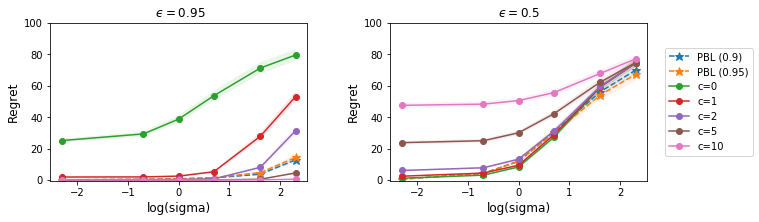

In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm
import numpy as np
import random
import scipy
import scipy.stats
import copy
from numpy.linalg import inv

def sub_plot(ax1,file,num): 
    info_ls = []
    c_ls = [0,0.01,0.1,0.5,1,2,5,10]   
    noise_ls = [0.1,0.5,1,2,5,10]
    x = np.log(noise_ls)
    for noise in noise_ls:
        info_ls.append(np.load(file+str(noise)+".npy",allow_pickle=True))
    
    alpha = [0.9,0.95,0.99]
    
    for k in range(3):
        if alpha[k] in [0.9,0.95]:
            y4= []
            for info in info_ls:
                y4.append(np.mean([np.array(item) for item in info[num][3]],0)[k])
            ax1.plot(x, y4,linestyle='--', marker="*", markersize=9,label='PBL ('+str(alpha[k])+')')
            
            y4_lower = []
            y4_upper = []
            for info in info_ls:
                series = [np.array(item) for item in info[num][3]]
                y4_lower.append(np.mean(series,axis=0)[k] - np.std(series,axis=0)[k]/np.sqrt(50))
                y4_upper.append(np.mean(series,axis=0)[k] + np.std(series,axis=0)[k]/np.sqrt(50))
            ax1.fill_between(x, y4_lower, y4_upper, alpha=.1)
                    
    for k in range(len(c_ls)):
        if c_ls[k] in [0,1,2,5,10]:
            y5= []
            for info in info_ls:
                y5.append(np.mean([np.array(item) for item in info[num][4]],0)[k])
            ax1.plot(x, y5,linestyle='-', marker="o", label='c='+str(c_ls[k]))
                
            y5_lower = []
            y5_upper = []
            for info in info_ls:
                series = [np.array(item) for item in info[num][4]]
                y5_lower.append(np.mean(series,0)[k] - np.std(series,0)[k]/np.sqrt(len(series)))
                y5_upper.append(np.mean(series,0)[k] + np.std(series,0)[k]/np.sqrt(len(series)))
            
            ax1.fill_between(x, y5_lower, y5_upper, alpha=.1)
                
    ax1.set_xlabel('log(sigma)', fontsize=12)
    ax1.set_ylabel('Regret', fontsize=12)
    
    
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
x = np.array(["500","1000","1500","2000","2500","3000"])

sub_plot(ax[0],"info_ls_toy_0.95_noise_",3)
sub_plot(ax[1],"info_ls_toy_0.5_noise_",3)

ax[0].set_title(r" $ϵ = 0.95$", fontsize=12)
ax[1].set_title(r"$ϵ = 0.5$", fontsize=12)

ax[0].set_ylim([-0.5,100])
ax[1].set_ylim([-0.5,100])

plt.tight_layout(pad=4)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
fig.savefig('../toy_example.png')